This notebook contains the analysis conducted for the paper

Eker s, Reese G, Obersteiner M. 2019. Modelling the drivers of a widespread shift to sustainable diets. *Nature Sustainability* doi:10.1038/s41893-019-0331-1

The contents are

1) Visualization the reference diet composition scenarios generated by the FeliX model

2) Generation, visualization and analysis of a scenario ensemble using the *Exploratory Modelling and Analysis Workbench* software


# 1) Reference diet composition scenarios

In [1]:
import pandas as pd
ref_data = pd.read_excel('H:/MyDocuments/IIASA-Felix/Model files/Reference_Diet_Scenarios.xlsx')
ref_data.tail()

,Variable,Scenario,2000,2001,2002,2003,2004,2005,2006,2007,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
70,Total Vegetarians,Sc4_Flexitarian+Vegan,1.172950e+09,1.185610e+09,1.198180e+09,1.210650e+09,1.223010e+09,1.235240e+09,1.247330e+09,1.259250e+09,...,1.528230e+09,1.522530e+09,1.516690e+09,1.510720e+09,1.504630e+09,1.498410e+09,1.492060e+09,1.485560e+09,1.478940e+09,1.472180e+09
71,Total Vegetarians,Sc3_Healthy+Vegan,1.172950e+09,1.185610e+09,1.198180e+09,1.210650e+09,1.223010e+09,1.235240e+09,1.247330e+09,1.259250e+09,...,1.597820e+09,1.593210e+09,1.588440e+09,1.583520e+09,1.578420e+09,1.573170e+09,1.567740e+09,1.562120e+09,1.556270e+09,1.550210e+09
72,Total Vegetarians,Sc2_Healthy+Ref,1.172950e+09,1.185610e+09,1.198180e+09,1.210650e+09,1.223010e+09,1.235240e+09,1.247330e+09,1.259250e+09,...,1.610300e+09,1.605810e+09,1.601110e+09,1.596200e+09,1.591070e+09,1.585740e+09,1.580190e+09,1.574430e+09,1.568450e+09,1.562250e+09
73,Total Vegetarians,Sc1_Flexitarian,1.172950e+09,1.185610e+09,1.198180e+09,1.210650e+09,1.223010e+09,1.235240e+09,1.247330e+09,1.259250e+09,...,1.851090e+09,1.846730e+09,1.842020e+09,1.836980e+09,1.831610e+09,1.825890e+09,1.819830e+09,1.813440e+09,1.806720e+09,1.799700e+09
74,Total Vegetarians,Sc0_Reference,1.172950e+09,1.185610e+09,1.198180e+09,1.210650e+09,1.223010e+09,1.235240e+09,1.247330e+09,1.259250e+09,...,1.877590e+09,1.873370e+09,1.868740e+09,1.863690e+09,1.858260e+09,1.852450e+09,1.846280e+09,1.839760e+09,1.832890e+09,1.825670e+09


In [2]:
ref_oois = list(set(ref_data['Variable']))
scenarios = set(ref_data['Scenario'])

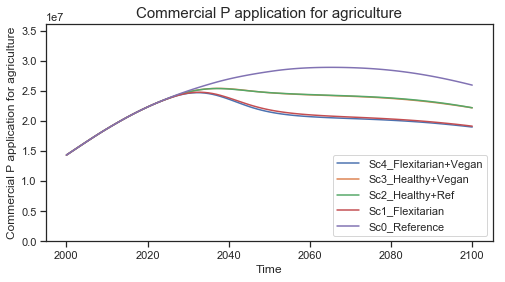

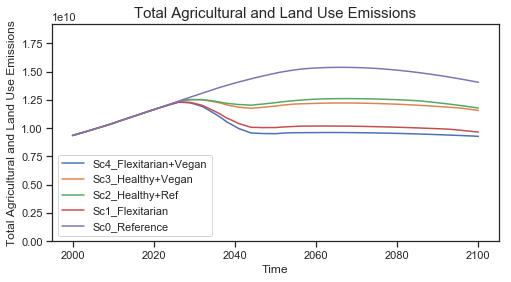

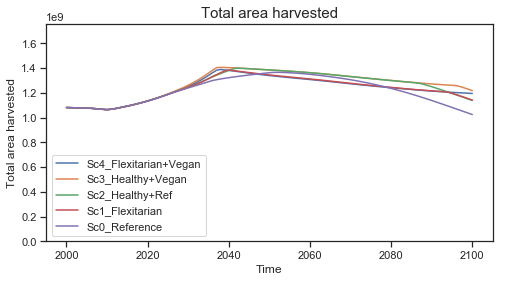

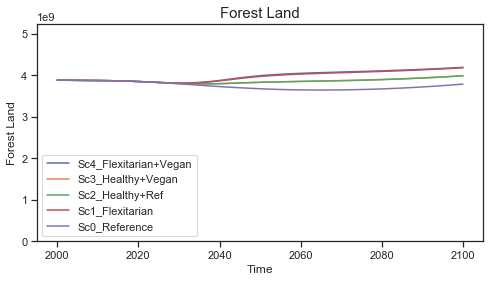

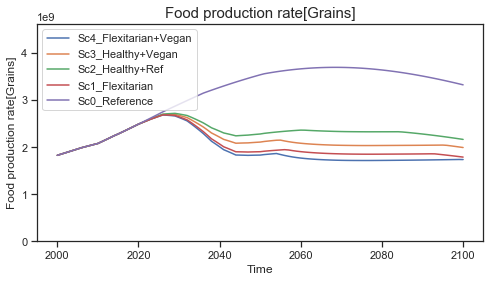

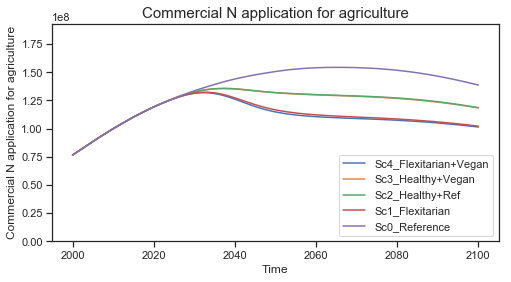

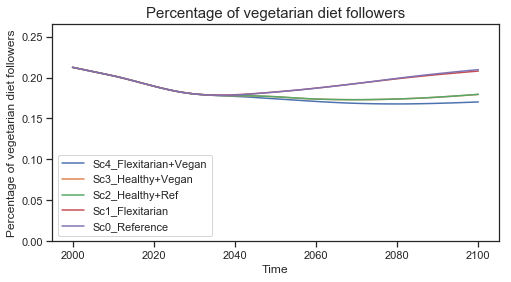

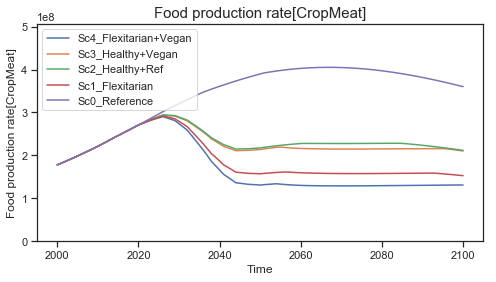

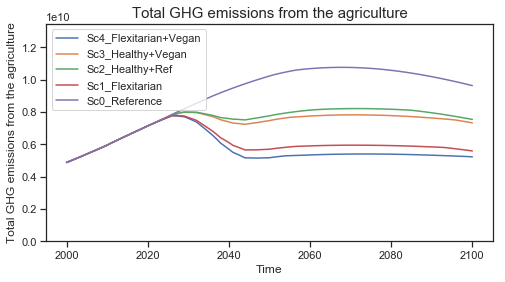

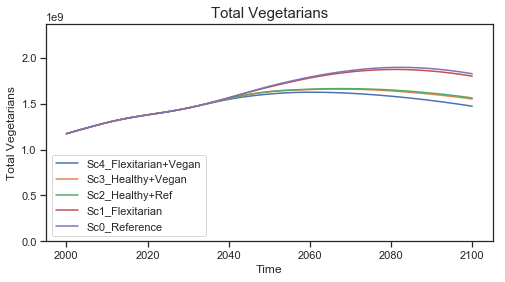

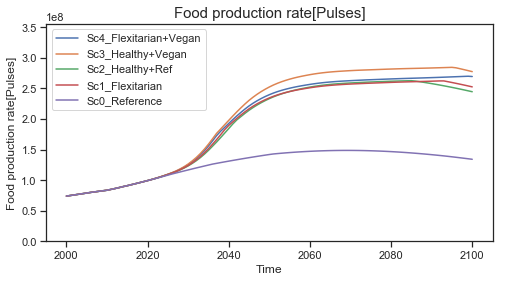

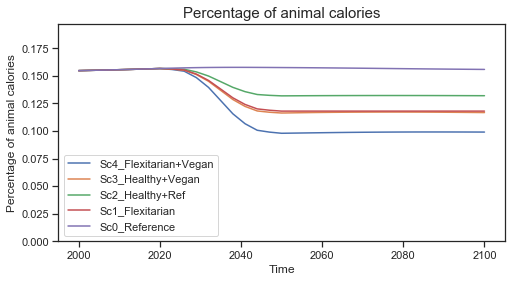

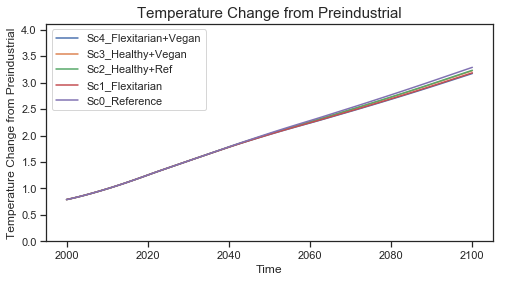

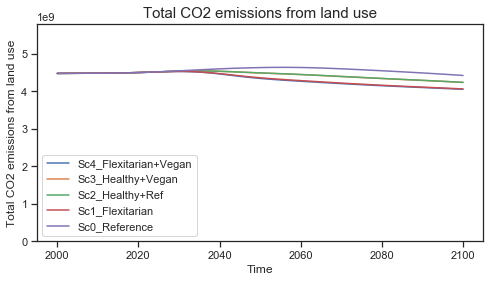

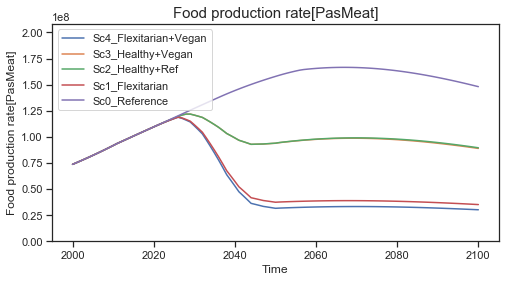

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
for ooi in ref_oois:
    fig, ax =  plt.subplots()
    fig.set_figwidth(8)
    data = ref_data[ref_data['Variable']==ooi]
    time = ref_data.columns[2:]
    y_max = 1.25 * data[time].max(skipna=True).max(skipna=True)
    ax.set_ylim([0, y_max])
    ax.set_xlabel("Time", fontsize=12)
    ax.set_ylabel(ooi, fontsize=12)
    ax.set_title(ooi, fontsize=15)
    for sc in data['Scenario']:
        ax.plot(data[data['Scenario']==sc][time].T, label=sc)

    plt.legend()
    plt.savefig('./Ref_dyn_{}.png'.format(ooi), dpi=600,  bbox_inches='tight')
    plt.show()

### Vegetarian population and percentage

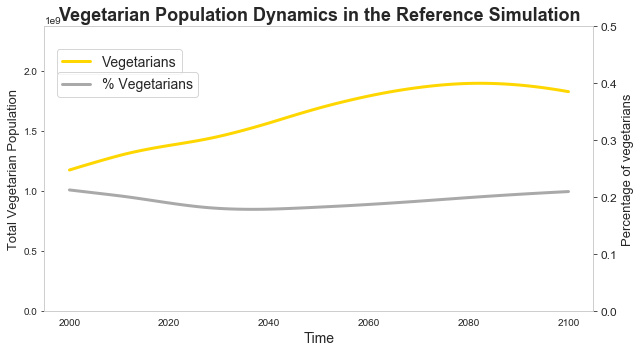

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

f, ax = plt.subplots(figsize=(9, 5))


ax2 = ax.twinx()


ax.set_ylabel('Total Vegetarian Population', fontsize=13)
ax2.set_ylabel('Percentage of vegetarians', fontsize=13)

data1 = ref_data[ref_data['Variable']=='Total Vegetarians']
data1 = data1[data1['Scenario']=='Sc0_Reference']
y_max = 1.25 * data1[time].max(skipna=True).max(skipna=True)
ax.set_ylim([0, y_max])

data2 = ref_data[ref_data['Variable']=='Percentage of vegetarian diet followers']
data2 = data2[data2['Scenario']=='Sc0_Reference']
ax2.set_ylim([0, .5])

ax.plot(data1[time].T, linewidth=3, color='gold', label='Vegetarians')
ax2.plot(data2[time].T, color='darkgrey', linewidth=3, label='% Vegetarians' )

ax.set_xlabel('Time', fontsize=14)
ax.set_title("Vegetarian Population Dynamics in the Reference Simulation", fontsize=18, fontweight='bold')

ax.grid(False)
ax2.grid(False)
ax.legend(loc=0, scatterpoints = 1, fontsize=14, bbox_to_anchor=(0.25, .92), borderaxespad=0.)
ax2.legend(loc=0, scatterpoints = 1, fontsize=14, bbox_to_anchor=(0.28, .84), borderaxespad=0.)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('./VegPop.png', dpi=600, bbox_inches='tight')
plt.show()

# 2) Exploratory Modelling and Analysis

In [1]:
import sys
sys.path.append(r"C:\Users\eker\AppData\Local\Continuum\anaconda3\Lib\site-packages\ema_workbench")
sys.path.append(r"C:\Windows\SysWOW64\VenDLL32.dll")

from ema_workbench.connectors.vensim import VensimModel

directory = 'H:/MyDocuments/IIASA-Felix/Model files/Parallel_NatCom2/'
vensimModel = VensimModel("DietModel", wd=directory, model_file=r'FeliX3_Sibel_v16_NoExcel.vpm')

C:\Anaconda3\lib\site-packages\ema_workbench\connectors\__init__.py:18: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
C:\Anaconda3\lib\site-packages\ema_workbench\connectors\__init__.py:23: ImportWarning: pysd connector not available
  warnings.warn("pysd connector not available", ImportWarning)


In [2]:
# READ UNCERTAINTY AND OUTCOME NAMES FROM EXCEL
import pandas as pd

df_unc = pd.read_excel(directory+'ScenarioFramework.xlsx', sheet_name='Uncertainties')
df_out = pd.read_excel(directory+'ScenarioFramework.xlsx', sheet_name='Outcomes')

In [3]:
df_out.head()

,Outcomes
0,Total Vegetarians
1,Food production rate[PasMeat]
2,Food production rate[CropMeat]
3,Food production rate[Pulses]
4,Food production rate[Grains]


In [4]:
df_unc['Min'] = df_unc['Reference'] * 0.5
df_unc['Max'] = df_unc['Reference'] * 1.5
df_unc.tail()

,Uncertainties,Reference,Min,Max
31,"SA k health risk attitude[""45-49""]",3.5,1.75,5.25
32,"SA k health risk attitude[""80-84""]",2.0,1.00,3.00
33,"SA x0 health risk attitude[""25-29""]",1.0,0.50,1.50
34,"SA x0 health risk attitude[""45-49""]",1.5,0.75,2.25
35,"SA x0 health risk attitude[""80-84""]",1.0,0.50,1.50


In [5]:
from ema_workbench import (TimeSeriesOutcome, 
                           perform_experiments,
                           RealParameter, 
                           CategoricalParameter,
                           ema_logging, 
                           save_results,
                           load_results)

In [6]:
import ipyparallel

client = ipyparallel.Client()
client.ids

[0, 1, 2, 3]

In [6]:
from ema_workbench import IpyparallelEvaluator
import time

vensimModel.outcomes = [TimeSeriesOutcome(out) for out in df_out['Outcomes']]

vensimModel.uncertainties = [RealParameter(row['Uncertainties'], row['Min'], row['Max']) for index, row in df_unc.iterrows()] + [CategoricalParameter('SA Diet Composition Switch', [0, 2, 3, 4])]

ema_logging.log_to_stderr(ema_logging.INFO)

start = time.time()
#with MultiprocessingEvaluator(vensimModel, n_processes=8) as evaluator:
#    results = evaluator.perform_experiments(40000, reporting_interval=1000)
results = perform_experiments(vensimModel, 2)

end = time.time()
print("took {} seconds".format(end-start))
fn = './Diet_EMA_40000_v4.tar.gz'
save_results(results, fn)

[MainProcess/INFO] performing 2 scenarios * 1 policies * 1 model(s) = 2 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 1 cases completed
[MainProcess/INFO] 2 cases completed
[MainProcess/INFO] experiments finished


took 1.7270722389221191 seconds


In [22]:
#results = load_results(fn)

#REDUCE THE TIME DIMENSION TO START FROM 2000

results = load_results('H:/MyDocuments/EclipseWorkspace/VensimTest/src/Diet_EMA_10000_v4.tar.gz')
new_outcomes = {}
experiments, outcomes = results
for key, value in outcomes.items():
    if key == 'Percentage of vegetarian diet followers':
        new_value = 100*value[:, 100:]
    elif key == 'Total Agricultural and Land Use Emissions':
        new_value = value[:, 100:] / 1e+09
    else:
        new_value = value[:, 100:]
    #print(new_value.shape)
    new_outcomes[key] = new_value
results2000 = experiments, new_outcomes


In [8]:
oois = ['Percentage of vegetarian diet followers',
        #'Commercial N application for agriculture',
        #'Mean Species Abundance',
        #'Forest Land',
        #'Total area harvested',
        'Total Agricultural and Land Use Emissions']
        #'Temperature Change from Preindustrial']

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
COLOR_LIST = sns.color_palette()
'''Default color list'''
sns.set_palette(COLOR_LIST)
def get_color(index):
    '''helper function for cycling over color list if the number of items
    is higher than the legnth of the color list
    '''
    corrected_index = index % len(COLOR_LIST)
    return COLOR_LIST[corrected_index]

C:\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [18]:
def make_legend2(categories,
                ax,
                ncol=2,
                legend_type=PATCH,
                alpha=.6):
    '''
    Helper function responsible for making the legend

    Parameters
    ----------
    categories : str or tuple
                 the categories in the legend
    ax : axes instance 
         the axes with which the legend is associated
    ncol : int
           the number of columns to use
    legend_type : {LINES, SCATTER, PATCH}
                  whether the legend is linked to lines, patches, or scatter 
                  plots
    alpha : float
            the alpha of the artists

    '''

    some_identifiers = []
    labels = []
    for i, category in enumerate(categories):
        color = get_color(i)

        artist = plt.Rectangle((0, 0), .5, .5, edgecolor=color,
                                   facecolor=color, alpha=alpha)

        some_identifiers.append(artist)

        if type(category) == tuple:
            label = '%.2f - %.2f' % category
        else:
            label = category

        labels.append(str(label))

    ax.legend(some_identifiers, labels, ncol=ncol,
              loc=3, borderaxespad=0.1,
              mode='expand', bbox_to_anchor=(0., 1.15, 1.33, .102))

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


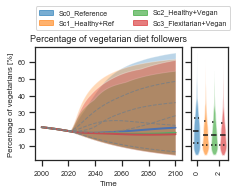

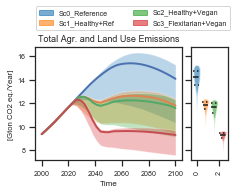

In [25]:
import matplotlib.pyplot as plt
from ema_workbench.analysis.plotting import lines, envelopes, plot_lines_with_envelopes
from ema_workbench.analysis.plotting_util import KDE, VIOLIN, HIST, BOXPLOT, make_legend, PATCH
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec

time = new_outcomes['TIME'][0]
sns.set(style="ticks", font_scale=.65)
ylabels = {'Percentage of vegetarian diet followers' : 'Percentage of vegetarians [%]',
        'Commercial N application for agriculture' : 'N application [Tg/Year]',
        'Mean Species Abundance' : 'Mean Species Abundance' ,
        'Forest Land' : 'Forest Land [ha]',
        'Total area harvested' : 'Cropland use [ha]',
        'Total Agricultural and Land Use Emissions' : '[Gton CO2 eq./Year]',
        'Temperature Change from Preindustrial': 'Temperature Change [Degrees C]'}

#fig = plt.figure(figsize=(7.08,4))
#grid = gridspec.GridSpec(1, 2) 
#grid.update(wspace = 0.1,
#            hspace = .35)
#ax1 = plt.subplot(grid[0,0])
#ax2 = plt.subplot(grid[0,1])
#axes = [ax1, ax2]


for j, ooi in enumerate(oois):
    fig, axes = envelopes(results2000, ooi, density=VIOLIN, group_by='SA Diet Composition Switch',
                                        legend=False,
                                        ylabels=ylabels, fill=True)  

    grouping_labels = ['Sc0_Reference', 'Sc2_Healthy+Ref', 'Sc3_Healthy+Vegan', 
                      'Sc4_Flexitarian+Vegan']
    grouping_labels2 = ['Sc0_Reference', 'Sc1_Healthy+Ref', 'Sc2_Healthy+Vegan', 
                      'Sc3_Flexitarian+Vegan']
    if ooi in ref_oois:
        for sc in grouping_labels:
            data = ref_data[ref_data['Variable']==ooi][ref_data['Scenario']==sc]
            if ooi == 'Percentage of vegetarian diet followers':
                y=[100*i[0] for i in data[time].T.values]
            elif ooi == 'Total Agricultural and Land Use Emissions':
                y=[i[0]/1e+09 for i in data[time].T.values]
            axes[ooi].plot(time, y, lw=2)
    
    #EXPERIMENTS TO SHOW
    exp = [1616, 4217, 7285, 7558, 2989]
    if ooi == 'Percentage of vegetarian diet followers':
        axes[ooi].set_title(ooi, fontsize=9,)
        for e in exp:
            data = new_outcomes['Percentage of vegetarian diet followers'][e]
            axes[ooi].plot(time, data, lw=1, linestyle='--', c='gray')
            #axes[ooi].annotate(str(e), (2100, data[-1]), )
    else:
        axes[ooi].set_title('Total Agr. and Land Use Emissions', fontsize=9,)
    
    axes[ooi].set_xlabel("Time", fontsize=8)
    #axes[ooi].set_title('Total Agr. and Land Use Emissions', fontsize=9,)
    #axes[ooi].plot(time, y)
    make_legend2(grouping_labels2, axes[ooi], alpha=0.6, legend_type=PATCH, ncol=2)
    fig.set_size_inches(3.46, 2.076)
    
    
    
    plt.savefig('./Envelopes_{}_W88.pdf'.format(ooi), dpi=600,  bbox_inches='tight')
    plt.savefig('./Envelopes_{}_W88.pdf'.format(ooi), dpi=600,  bbox_inches='tight')
    plt.savefig('./Envelopes_{}_W88.eps'.format(ooi), dpi=600,  bbox_inches='tight')
    plt.savefig('./Envelopes_{}_W88.eps'.format(ooi), dpi=600,  bbox_inches='tight')
plt.show()

### Scatter plot in 2050

In [121]:
#make a df with diet composition switch
import pandas as pd
df_plot = pd.DataFrame(columns=['Percentage of Vegetarians', 'Total Agriculture and Land Use Emissions','Diet Composition Switch'])

In [122]:
df_plot['Percentage of Vegetarians'] = outcomes['Percentage of vegetarian diet followers'][:, -50] * 100

In [123]:
df_plot['Total Agriculture and Land Use Emissions'] = outcomes['Total Agricultural and Land Use Emissions'][:, -50] / 1e+09 #[Gton]
df_plot.shape

(10000, 3)

In [124]:
df_plot['Diet Composition Switch'] = experiments['SA Diet Composition Switch']
df_plot.head()

,Percentage of Vegetarians,Total Agriculture and Land Use Emissions,Diet Composition Switch
0,13.735361,15.202866,0
1,18.826146,12.293857,2
2,19.002280,11.931425,3
3,23.505469,14.476091,0
4,29.905605,11.138542,3


In [125]:
df_plot['Cropland Use'] = outcomes['Total area harvested'][:, -50] / 1e+09 #[billion ha]
df_plot['N Application'] = outcomes['Commercial N application for agriculture'][:, -50] / 1e+06 #[Tg]
df_plot.shape

(10000, 5)

In [126]:
units = {'Percentage of Vegetarians': '[%]',
         'Total Agriculture and Land Use Emissions' : '[$GtCO_{2}$eq $yr^{-1}$]',
         'Cropland Use' : '[billion ha]',
         'N Application' : '[Tg $yr^{-1}$]'}

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


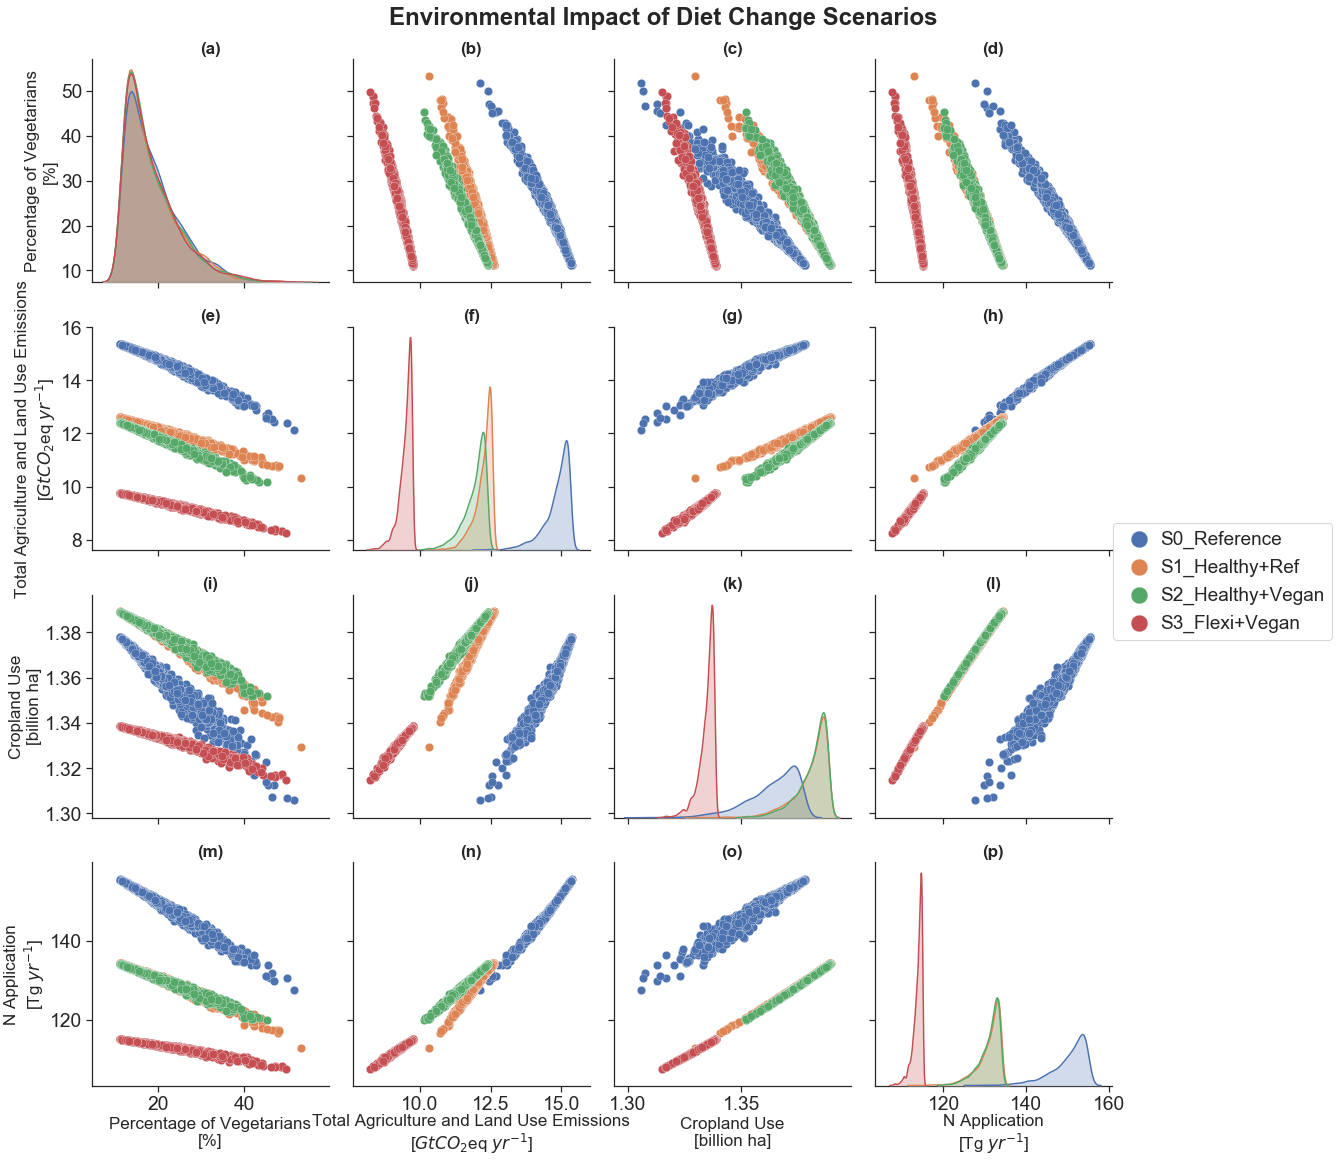

In [142]:
import seaborn as sns
import string

import matplotlib.pyplot as plt
from ema_workbench.analysis.plotting import lines, envelopes, plot_lines_with_envelopes
from ema_workbench.analysis.plotting_util import KDE, VIOLIN, HIST, BOXPLOT, make_legend, PATCH

#colors = ["amber", "greyish", "faded green", "dusty purple"]
colors = sns.color_palette()
#sns.palplot(sns.xkcd_palette(colors))
 
#sns.set_style("whitegrid")
sns.set(style="ticks", font_scale=1.75)
#sns.set(font_scale=1.5)
g = sns.pairplot(df_plot, 
                 hue='Diet Composition Switch',
                vars=['Percentage of Vegetarians', 'Total Agriculture and Land Use Emissions',
                     'Cropland Use', 'N Application'],
                height=4,
                palette=colors,
                diag_kind="kde",
                plot_kws={"s": 70, "linewidth":.25})

#g.fig.set_size_inches(7.08, 7.08)

xlabels = [g.axes[3][j].get_xlabel() for j in [0, 1, 2, 3]]
for j in [0, 1, 2, 3]:
    g.axes[3][j].set_xlabel(xlabels[j]+'\n{}'.format(units[xlabels[j]]), fontsize=17, labelpad=3) 
alp = list(string.ascii_lowercase)
for i in [0, 1, 2, 3]:
    for j in [0, 1, 2, 3]:
        g.axes[i][j].set_title("({})".format(alp[i*4+j]), fontsize=17, fontweight='bold')
 
    
ylabels = [g.axes[j][0].get_ylabel() for j in [0, 1, 2, 3]]
for j in [0, 1, 2, 3]:
    g.axes[j][0].set_ylabel(ylabels[j]+'\n{}'.format(units[ylabels[j]]), fontsize=17, labelpad=3) 

plt.suptitle("Environmental Impact of Diet Change Scenarios", y=1, fontsize=24, fontweight='bold')
g.fig.subplots_adjust(wspace=.1, hspace=.2)

handles = g._legend_data.values()
labels = g._legend_data.keys()
leg_labels = ['S0_Reference', 'S1_Healthy+Ref', 'S2_Healthy+Vegan', 'S3_Flexi+Vegan']
g.fig.legends[0].set_visible(False)
g.fig.subplots_adjust(right=.83)
lgd = g.fig.legend(handles=handles, labels=leg_labels, loc='right', ncol=1, 
             fontsize=19,  handletextpad=.07, markerscale=2, borderaxespad=0.5)


plt.rcParams["figure.figsize"] = [7.08,7.08]
#plt.savefig('./PairsScatter_4x4_v4.pdf', dpi=300,  bbox_inches='tight', bbox_extra_artists=(lgd,))
#plt.savefig('./PairsScatter_4x4_v4.eps', dpi=300,  bbox_inches='tight', bbox_extra_artists=(lgd,))
plt.savefig('./PairsScatter_4x4_W180.eps', dpi=300,  bbox_inches='tight', bbox_extra_artists=(lgd,))
plt.show()
    
#import numpy as np
#data1 = df_plot['Percentage of vegetarian diet followers'][df_plot['Diet Composition Switch']==0]
#data2 = df_plot['Total area harvested'][df_plot['Diet Composition Switch']==0]
#qr1 = np.percentile(data1, 75)
#qr2 = np.percentile(data2, 25)
#g.axes[1][0].axvline(x=qr1, color = 'indianred')
#g.axes[1][0].annotate('1st quartile', xy=(.23, 1.45e+10), xytext=(.23, 1.45e+10), fontsize=12, fontstyle='italic')
#g.axes[0][1].annotate('3rd quartile', xy=(1.4e+10, .75), xytext=(1.4e+10, .75), fontsize=12, fontstyle='italic')
#ax.annotate('Bouwman et al. 2009',
#            xy=(x_scatter[0], y_scatter[0]), xycoords='data',
#            xytext=(65, 20), textcoords='offset points',
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            horizontalalignment='right', verticalalignment='bottom')


# PRIM


In [7]:
from ema_workbench import load_results
import ema_workbench.analysis.prim as prim
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
scs = [0, 2, 3, 4]
time_pts = [-51, -1]#2050, 2100
time_dic = {-51:2050, -1: 2100}
sc_dic = {0:0, 2:1, 3:2, 4:3}
results = load_results('./Diet_EMA_40000_v4.tar.gz')#'H:/MyDocuments/EclipseWorkspace/VensimTest/src/Diet_EMA_10000_v3.tar.gz')
save_dir = 'H:/MyDocuments/Publications/Journal/2019_DietChange/FinalSubmission/Figures/prim'
experiments, outcomes = results
for sc in scs:
    logical_index = [experiments['SA Diet Composition Switch'] == sc]
    new_experiments = experiments[logical_index]
    new_outcomes = {}
    for key, value in outcomes.items():
        new_outcomes[key] = value[logical_index]
    new_results = new_experiments, new_outcomes
    #save_results(new_results, './results_DCS_{}_sub2.tar.gz'.format(sc))
    data = new_outcomes['Percentage of vegetarian diet followers']
    for t in time_pts:
        qr = np.percentile(data[:, t], 75)
        y = data[:, t] >= qr
        print("for scenario {} at time {}, will look for scenarios > than {}.".format(sc, t, qr))
        print("there are {} scenarios of interest.".format(sum(y)))
        
        #define the prim object
        prim_obj = prim.Prim(new_experiments, y, mass_min=0.05, threshold=0.8, peel_alpha=0.05)#, update_function='guivarch')
        box1 = prim_obj.find_box()
        box1.show_tradeoff()
        plt.savefig(save_dir+'/sc{}/prim_tradeoff_sc{}_t{}.png'.format(sc,sc, t), dpi=300)
        plt.show()
        
        for box_no in [21, 31, 41, 51]:
            try:
                pd_prim = box1.inspect(box_no)
                pd_prim = pd_prim['box {}'.format(box_no)]
                pd_prim = pd_prim[(pd_prim['qp values 0']<=0.1) & (pd_prim['qp values 1']<=0.1)]
                pd_prim.to_csv(save_dir+'/sc{}/Prim_sc{}_t{}_box{}.csv'.format(sc,sc, t, box_no))
                nrow = pd_prim.shape[0]
                fig, ax = box1.inspect(box_no, style='graph')
                
                ax.set_title("Scenario discovery results for scenario {} and time {}".format(sc_dic[sc], time_dic[t]), fontsize=13)
                ylabels = ax.get_yticklabels()
                ylabels = [item.get_text()[2:] for item in ylabels]
                ax.set_yticklabels(ylabels, fontsize=12)
                fig.set_size_inches(7.08, nrow*0.5, forward=True)
                plt.savefig(save_dir+'/sc{}/Prim_sc{}_t{}_box{}_color.png'.format(sc,sc, t, box_no), dpi=300,  bbox_inches='tight')
                #plt.savefig(save_dir+'/sc{}/Prim_sc{}_t{}_box{}.eps'.format(sc,sc, t, box_no), dpi=300,  bbox_inches='tight')
            except(IndexError) as e:
                pass

coverage = cases of interest in a box / the total number of cases of interests.

density = the cases of interest in a box / the total number of cases in that box.